# Linear Regression - KC House Data

**Nikitia Ramruthan**

In this analysis I used a Linear Regression model to predict prices of houses sold based on a number of different features. The sales occur in the King County region, USA, which includes Seattle. It includes homes sold between May 2014 and May 2015. I start by exploring the data and the relationship between the variables. I show a few of these important relationships in plots and then try to perform an accurate regression on this dataset.

### Importing Libraries and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read raw data
url = 'https://raw.githubusercontent.com/nikitia/data_science_projects/main/machine_learning/linear_regression/kc_house_data.csv'
HouseData = pd.read_csv(url)
HouseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Exploratory Data Analysis

In [3]:
# confirming the extent of data
HouseData.shape

(21613, 21)

In [4]:
# statistical summary of features
HouseData.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# data types that are present in the dataset
print(HouseData.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


* 'date' is a Python object which contains a timestamp as a categorical feature. This should not have an impact on the analysis and can therefore be ignored.
* 'id' is a value that will not affect the price and can therefore also be excluded.

In [6]:
# are there and NaN or null values throughout dataset
HouseData.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
duplicates = HouseData[HouseData.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


* The data is well structured and does not contain any NaN values or duplicated rows.

In [8]:
# what is the number of unique values in each column
HouseData.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

### Correlation Between Features and Target

In [9]:
features = HouseData.iloc[:,3:].columns.tolist()
target = HouseData.iloc[:,2].name

In [10]:
correlations = {}
for f in features:
    HouseData_corr = HouseData[[f,target]]
    x1 = HouseData_corr[f].values
    x2 = HouseData_corr[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [11]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


In [12]:
corr = HouseData.corr()

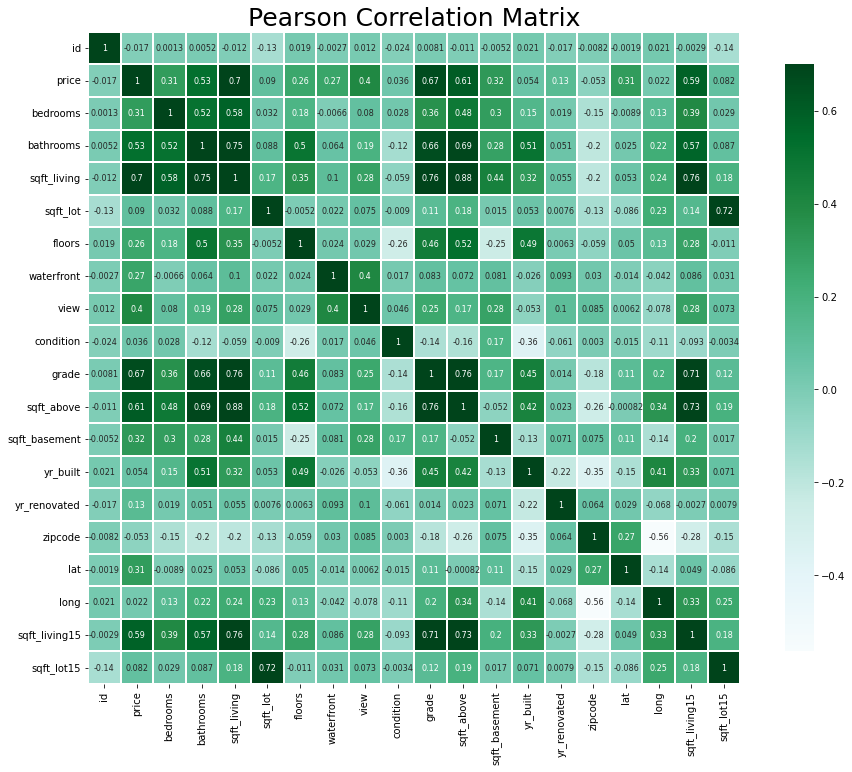

In [13]:
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot_kws={"size":8}, cbar_kws={"shrink": .9});

The Pearson correlation coefficient, r, can take a range of values from +1 to -1. A value of 0 indicates that there is no correlation.
* Strength of Association: Positive (excl zipcode)
* Strong Correlation: 0.5 to 1.0
* Somewhat Correlated: 0.3 to 0.5
* Weak Correlation: 0.1 to 0.3

For this reason we will drop the following features for the regression analysis:
* id
* date
* sqft_lot
* sqft_lot15
* yr_built
* zipcode
* condition
* long

### Pairplot Visualisation

Creating Seaborn Pairplots for the top 5 correlated features ('sqft_living','grade','sqft_above', 'sqft_living15', 'bathrooms') these features are correlated in the 0.5 to 1 range which is strongly correlated. This is done to get a better understanding of how the various features are distributed with regard to the 'price' as well as the number of 'bedrooms'.

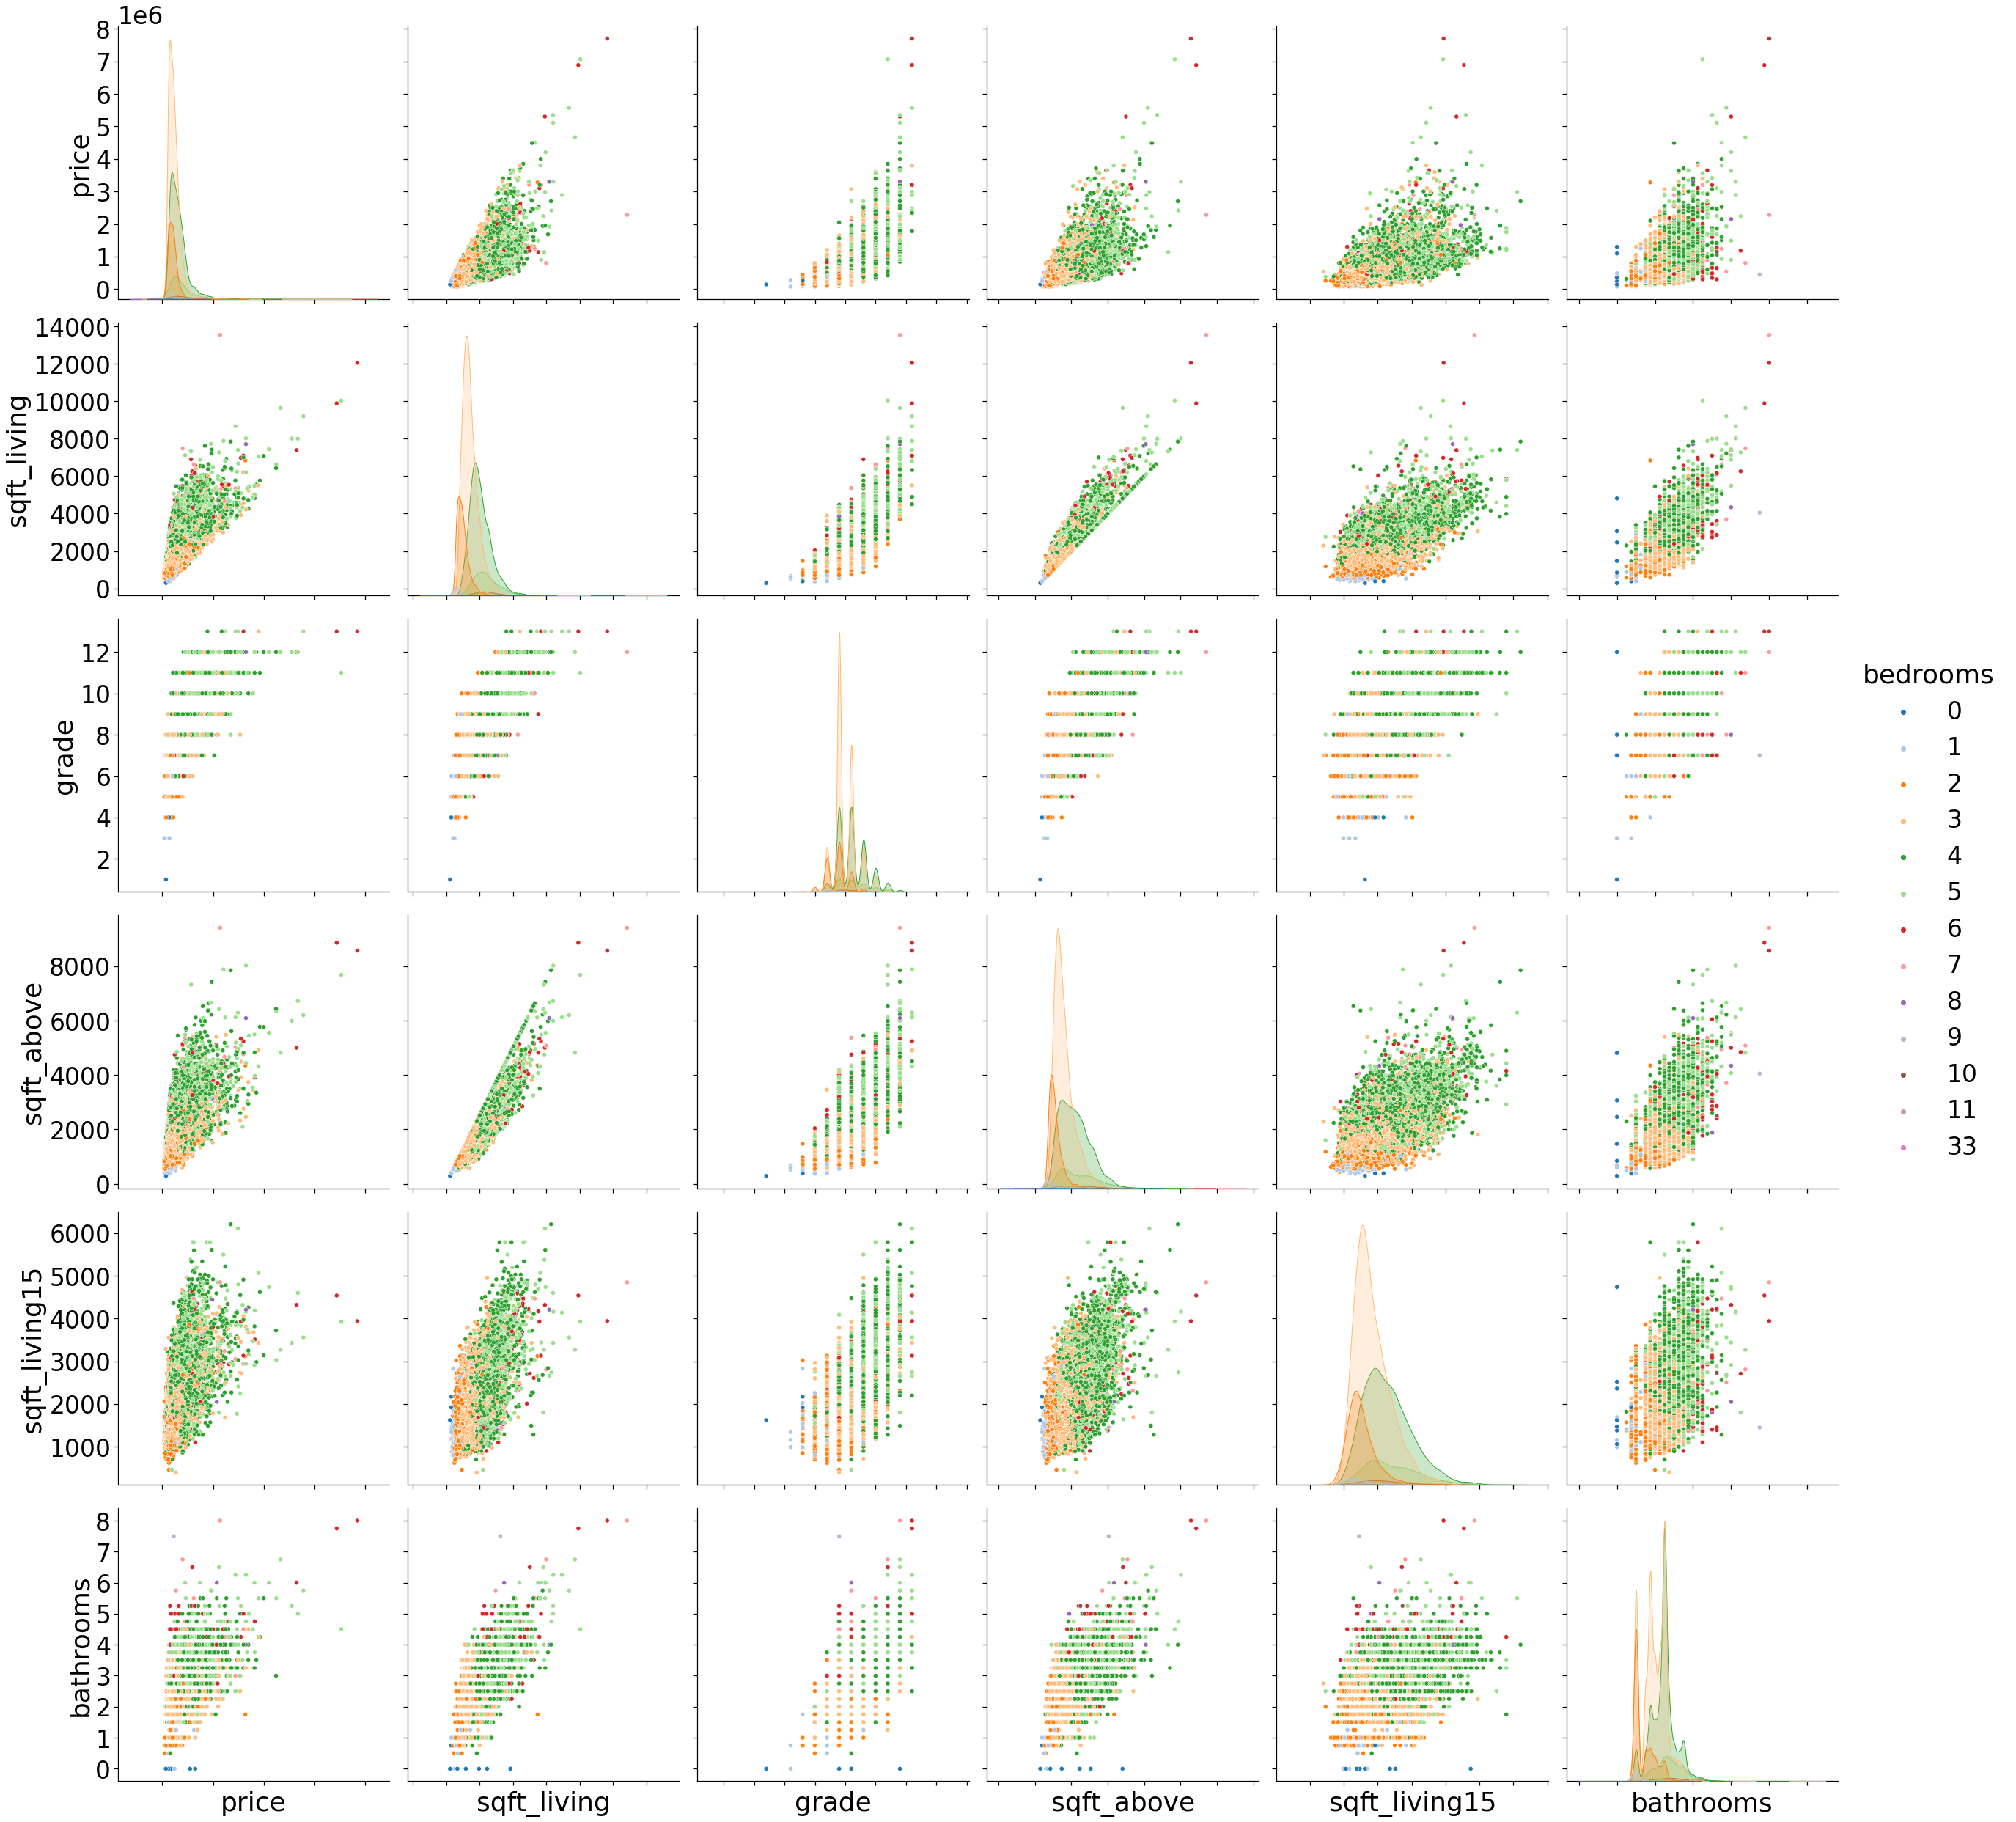

In [14]:
with sns.plotting_context("notebook",font_scale=3):
    g = sns.pairplot(HouseData[['price','sqft_living','grade','sqft_above','sqft_living15','bathrooms','bedrooms']], 
                 hue='bedrooms', palette='tab20',height=6)
g.set(xticklabels=[]);

## Linear Regression
### Split Data into X and Y Variables

Here I will drop the features as listed above to perform a regression with only significant features to ensure model accuracy.

In [15]:
new_HouseData = HouseData[['price','sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','bedrooms','lat','waterfront','floors','yr_renovated',]]

In [16]:
Y = new_HouseData.price
Y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [17]:
X = new_HouseData.drop(['price'], axis=1)
X

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated
0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1.0,0
1,2570,7,2170,1690,2.25,0,400,3,47.7210,0,2.0,1991
2,770,6,770,2720,1.00,0,0,2,47.7379,0,1.0,0
3,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1.0,0
4,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,8,1530,1530,2.50,0,0,3,47.6993,0,3.0,0
21609,2310,8,2310,1830,2.50,0,0,4,47.5107,0,2.0,0
21610,1020,7,1020,1020,0.75,0,0,2,47.5944,0,2.0,0
21611,1600,8,1600,1410,2.50,0,0,3,47.5345,0,2.0,0


### Perform 80/20 Data Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Data Dimensions

In [19]:
X_train.shape, Y_train.shape

((17290, 12), (17290,))

In [20]:
X_test.shape, Y_test.shape

((4323, 12), (4323,))

### Define Model

In [21]:
model = linear_model.LinearRegression()

### Build Training Model

In [22]:
model.fit(X_train, Y_train)

LinearRegression()

### Apply trained model to make prediction (on test set)

In [23]:
Y_pred = model.predict(X_test)

## Prediction Results
### Print Model Performance

In [24]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 1.28753525e+02  8.48910067e+04  6.47083275e+01  5.25176759e+00
 -7.65623595e+03  6.17320939e+04  6.40451972e+01 -2.34560845e+04
  6.73366046e+05  5.92937267e+05 -3.14186045e+04  5.73949168e+01]
Intercept: -32428992.276222616
Mean squared error (MSE): 46094996848.06
Coefficient of determination (R^2): 0.66


In [25]:
# accuracy on train
print("The Training Accuracy is: ", model.score(X_train, Y_train)*100,'%')

# accuracy on test
print("The Testing Accuracy is: ", model.score(X_test, Y_test)*100,'%')

The Training Accuracy is:  66.1822571472341 %
The Testing Accuracy is:  66.0838253430517 %


## Scatter Plots
### The Data

In [26]:
Y_test

14673     499000.0
15469     335000.0
15153     225000.0
15433     546000.0
10845     360000.0
           ...    
16124    1925000.0
7000      595000.0
20644     418000.0
13237     429000.0
4616      325000.0
Name: price, Length: 4323, dtype: float64

In [27]:
np.array(Y_test)

array([499000., 335000., 225000., ..., 418000., 429000., 325000.])

In [28]:
Y_pred

array([427407.07837789, 338818.92678896, 364293.34193867, ...,
       565180.65441756, 230646.90831605, 356056.5138506 ])

### The Plot

<AxesSubplot:xlabel='price'>

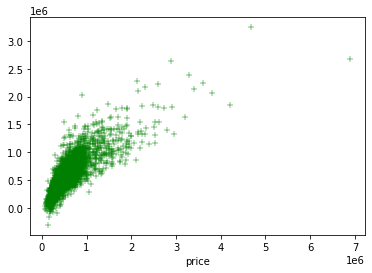

In [29]:
sns.scatterplot(x = Y_test, y = Y_pred, alpha=1, marker="+", color = "green")

### XGBoost
XGBoost refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems. Decision trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. Although this is not necassarily required, here I try an XGBoost to compare the accuracy of the model perfomance.

In [30]:
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [31]:
traindf, testdf = train_test_split(X_train, test_size = 0.2)
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [32]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,Y_test))

0.8038985730202711


Here we can see that our accuracy falls between 0.65 and 0.80. The coefficient of determination is a measurement used to explain how much variability of one factor can be caused by its relationship to another related factor. The Explained Variance score is similar to the R^2 score, with the notable difference that it does not account for systematic offsets in the prediction. Most often the R^2 score should be preferred.